# Preâmbulo

In [93]:
import numpy as np
import pandas as pd
import exp_physics as ep
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as scp

In [94]:
def extract_sigma(cov: np.ndarray) -> np.ndarray:
    sigma = []
    for i in range(cov.shape[0]):
        sigma.append(np.sqrt(abs(cov[i,i])))
    return np.array(sigma)

In [95]:
I = lambda theta, I0, eta, xi : I0*(1 - eta * np.sin(2*theta) + xi * np.cos(2*theta))

In [96]:
df_sem_espelho = pd.read_csv('dados/sem_espelho.csv')

df0 = pd.read_csv('dados/placa0.csv')

df45_1 = pd.read_csv('dados/placa45_1.csv')

df45_2 = pd.read_csv('dados/placa45_2.csv')

df20 = pd.read_csv('dados/placa20.csv')

In [97]:
for df in [df_sem_espelho, df0, df45_1, df45_2, df20]:
    df['Theta'] = df['Theta'].apply(np.deg2rad) 

# Gráficos

### Caso sem espelho, placa a 0º

In [98]:
fit1, cov1 = scp.curve_fit(I, df_sem_espelho['Theta'], df_sem_espelho['I']) 

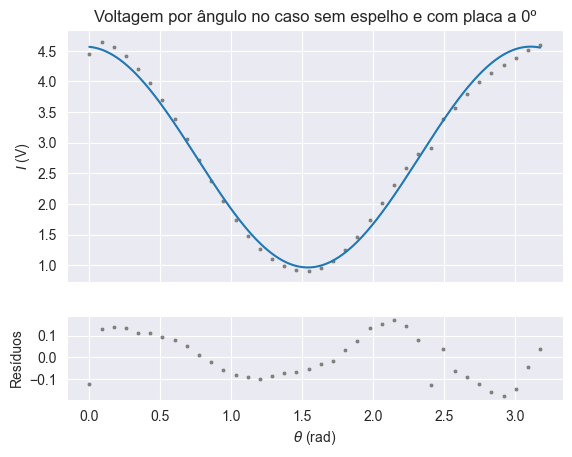

In [99]:
ep.residual_plot(
    df_sem_espelho['Theta'],
    df_sem_espelho['I'],
    I,
    fit1,
    x_title = r'$\theta$ (rad)',
    y_title= r'$I$ (V)',
    title = r'Voltagem por ângulo no caso sem espelho e com placa a 0º',
    residual_title='Resíduos'
)


In [100]:
fit1

array([2.76503344, 0.03957023, 0.65066225])

In [101]:
sigma1 = extract_sigma(cov1)
sigma1

array([0.01731515, 0.00901672, 0.009793  ])

### Caso placa a 0º

In [102]:
fit2, cov2 = scp.curve_fit(I, df0['Theta'], df0['I']) 

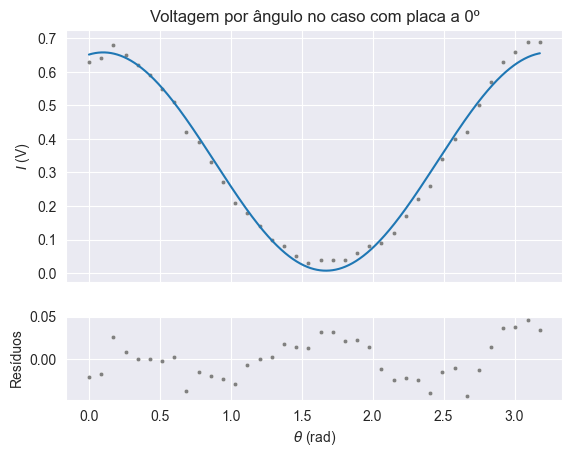

In [103]:
ep.residual_plot(
    df0['Theta'],
    df0['I'],
    I,
    fit2,
    x_title = r'$\theta$ (rad)',
    y_title= r'$I$ (V)',
    title = r'Voltagem por ângulo no caso com placa a 0º',
    residual_title='Resíduos'
)


In [104]:
fit2

array([ 0.33242449, -0.19442861,  0.9590875 ])

In [105]:
sigma2 = extract_sigma(cov2)
sigma2

array([0.00397196, 0.01735904, 0.02064928])

### Caso placa a 45º, na volta

In [106]:
fit3, cov3 = scp.curve_fit(I, df45_1['Theta'], df45_1['I'])

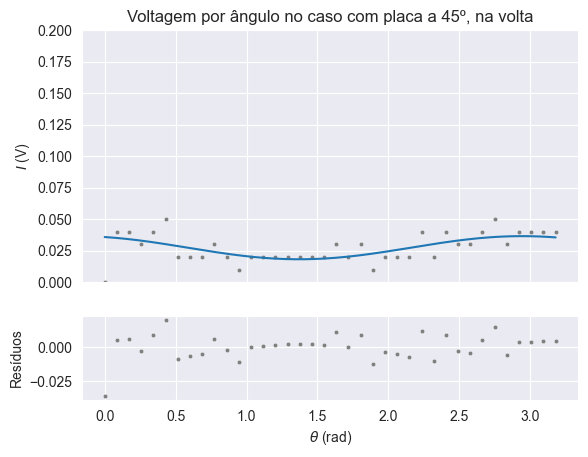

In [107]:
ep.residual_plot(
    df45_1['Theta'],
    df45_1['I'],
    I,
    fit3,
    x_title = r'$\theta$ (rad)',
    y_title= r'$I$ (V)',
    title = r'Voltagem por ângulo no caso com placa a 45º, na volta',
    residual_title='Resíduos',
    y_lim=(0.0, .2)
)

In [108]:
fit3

array([0.02731915, 0.13063721, 0.30970951])

In [109]:
sigma3 =    extract_sigma(cov3)
sigma3

array([0.00156529, 0.08279746, 0.08241155])

### Caso placa a 45º, na ida

In [110]:
fit4, cov4 = scp.curve_fit(I, df45_2['Theta'], df45_2['I'])

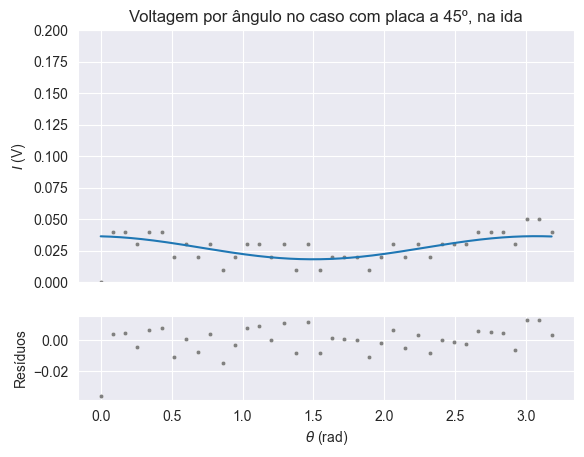

In [111]:
ep.residual_plot(
    df45_2['Theta'],
    df45_2['I'],
    I,
    fit4,
    x_title = r'$\theta$ (rad)',
    y_title= r'$I$ (V)',
    title = r'Voltagem por ângulo no caso com placa a 45º, na ida',
    residual_title='Resíduos',
    y_lim=(0.0, .2)
)

In [112]:
fit4

array([0.02729348, 0.05011308, 0.33209013])

In [113]:
sigma4 = extract_sigma(cov4)
sigma4

array([0.00156271, 0.08245841, 0.08270264])

### Caso placa a 20º

In [114]:
fit5, cov5 = scp.curve_fit(I, df20['Theta'], df20['I'])

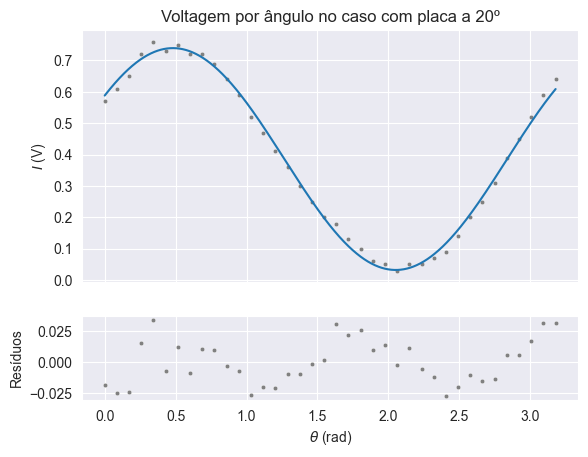

In [115]:
ep.residual_plot(
    df20['Theta'],
    df20['I'],
    I,
    fit5,
    x_title = r'$\theta$ (rad)',
    y_title= r'$I$ (V)',
    title = r'Voltagem por ângulo no caso com placa a 20º',
    residual_title='Resíduos'
)